In [135]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv("./Telco_Data.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
# data = data.drop(columns=['customerID'])

In [55]:
label = data.Churn
data = data.drop(columns=['Churn'])

In [56]:
for i in data.keys():
    print (i , " : ",len(set(data[i])))

gender  :  2
SeniorCitizen  :  2
Partner  :  2
Dependents  :  2
tenure  :  73
PhoneService  :  2
MultipleLines  :  3
InternetService  :  3
OnlineSecurity  :  3
OnlineBackup  :  3
DeviceProtection  :  3
TechSupport  :  3
StreamingTV  :  3
StreamingMovies  :  3
Contract  :  3
PaperlessBilling  :  2
PaymentMethod  :  4
MonthlyCharges  :  1585
TotalCharges  :  6531


In [6]:
# y

In [7]:
totalcharges = np.array(data.TotalCharges)

In [11]:
missing = []
summ= 0.0
for i in range(len(totalcharges)):
    try:
        totalcharges[i] = float(totalcharges[i])
        summ+=float(totalcharges[i])
    except:
        missing.append(i)

In [12]:
for i in missing:
    totalcharges[i] = summ/(len(totalcharges)-len(missing))

In [57]:
totalcharges = list(map(float,totalcharges))

In [58]:
data['TotalCharges'] = totalcharges

In [59]:
data['MonthlyCharges'] = list(map(float,data['MonthlyCharges']))

In [17]:
# data.to_csv('Telco_Data_2.csv',index=False)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [28]:
# datatypes[0]

In [61]:
keys = list(data.keys())

In [62]:
encodingcols = []

In [63]:
for i in keys:
    if (type(data[i][0]) == str):
        encodingcols.append(i)

In [64]:
keys

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [65]:
encodingcols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [66]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for i in encodingcols:
    data[i]     = labelencoder_X.fit_transform(data[i]) 

In [67]:
data.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95


In [72]:
from sklearn.metrics import classification_report
def reports(truelab,predlabels):
    print(confusion_matrix(truelab, predlabels))
    print("Accuracy ",round(accuracy_score(truelab, predlabels),2)*100)
    
    print (classification_report(y_pred=predlabels,y_true=truelab))
    return ( round(accuracy_score(truelab, predlabels),2)*100)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 101)

In [103]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# GNB

In [104]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

GAUSIAN = reports(y_test,gaussiannbpred)

[[1190  356]
 [ 160  407]]
Accuracy  76.0
              precision    recall  f1-score   support

          No       0.88      0.77      0.82      1546
         Yes       0.53      0.72      0.61       567

    accuracy                           0.76      2113
   macro avg       0.71      0.74      0.72      2113
weighted avg       0.79      0.76      0.77      2113



In [111]:
from sklearn.metrics import cohen_kappa_score
from sklearn.utils import resample
from scipy.sparse import coo_matrix
import copy
import random

# Boot Strap 

In [179]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_sample(X_train,y_train)

In [180]:
X = copy.deepcopy(X_train)
Y = copy.deepcopy(y_train)

In [181]:
X_sparse = coo_matrix(X_train)

In [182]:
epoch = 50

In [183]:
# X_train

In [184]:
kappascores = []
index = np.arange(len(X_train))
for i in range(epoch):
    temp = np.random.choice(index,size=100,replace=True)
    gaussiannb= GaussianNB()
#     print (temp)
    train_2 = []
    y_train_2 = y_train[temp]
    for col in range(len(X_train.T)):
        train_2.append(X_train.T[col][temp])
        
    train_2 = np.array(train_2).T        
    
    gaussiannb.fit(train_2, y_train_2)
    gaussiannbpred = gaussiannb.predict(X_test)
    probs = gaussiannb.predict(X_test)

#     GAUSIAN = reports(y_test,gaussiannbpred)
    kappascores.append(cohen_kappa_score(y_test,gaussiannbpred))
    

In [185]:
# len(X_train.T[0][temp])

In [186]:
ZZ = np.arange(len(kappascores))

Text(0.5, 1.0, 'cohens kappa curve')

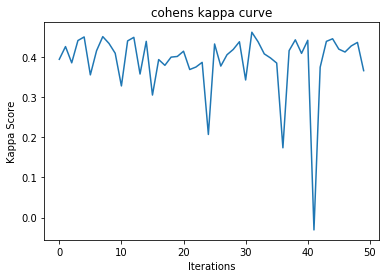

In [187]:
plt.plot(ZZ,kappascores)
plt.xlabel("Iterations")
plt.ylabel("Kappa Score")
plt.title("cohens kappa curve")